In [8]:
import pandas as pd
import seaborn as sborn
data=pd.read_csv('StudentsPerformance2.txt',delimiter='\t')
students=data.copy()
students.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,NaN,76.0,78.0,75.0


In [9]:
students.shape #Veri seti 1000 satır ve 8 sütundan oluşuyor

(1000, 8)

In [10]:
students.info()
#1000 adet gözlem değerimiz var
# 8 değişkenimiz varmış, değişkenlerin tipleri belirtil
#Ramda 62.6KB alan kapladı

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       994 non-null    object 
 1   race/ethnicity               999 non-null    object 
 2   parental level of education  999 non-null    object 
 3   lunch                        996 non-null    object 
 4   test preparation course      994 non-null    object 
 5   math score                   993 non-null    float64
 6   reading score                995 non-null    float64
 7   writing score                995 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [11]:
students.describe().T #sürekli (sayısal) değişkenlerin betimsel özellikleri:

,count,mean,std,min,25%,50%,75%,max
math score,993.0,66.131923,15.172852,0.0,57.0,66.0,77.0,100.0
reading score,995.0,69.192965,14.582760,17.0,59.0,70.0,79.0,100.0
writing score,995.0,68.060302,15.222375,10.0,57.5,69.0,79.0,100.0


In [12]:
students.isnull().values.any() #Veri setinde eksik deger varmı?

True

In [13]:
students.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir

gender                         6
race/ethnicity                 1
parental level of education    1
lunch                          4
test preparation course        6
math score                     7
reading score                  5
writing score                  5
dtype: int64

In [14]:
values= students.select_dtypes(include = ["object"]) #obje türündeki özellikler
values

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,NaN
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [15]:
values2= students.select_dtypes(include = ["float64"])#sayısal özellikler
values2

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [16]:
students["gender"].value_counts()


gender
female    515
male      479
Name: count, dtype: int64

In [17]:
students["race/ethnicity"].value_counts()#Öğrencilerin etnik kökenlerin frekansları

race/ethnicity
group C    319
group D    261
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [18]:
students["parental level of education"].value_counts()#Öğrencilerin eğitim düzeyi frekansları

parental level of education
some college          226
associate's degree    222
high school           195
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

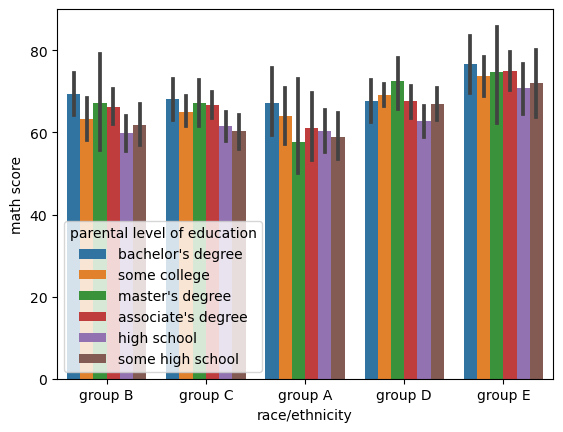

In [19]:
sborn.barplot(x ="race/ethnicity", y = "math score", hue="parental level of education" , data = students);

Bu grafiğimizde öğrencilerin etnik kökenlerinin eğitim düzeyine bağlı olarak matematik puanlarını gösteren görsel verilmiştir

Bu grafiğe bakarak E sınıfı kökenindeki öğrencilerin matematik dersinin diğer kökenlerdeki öğrencilere göre daha yetenekli 
olduğunu yorumlayabiliriz.

In [20]:
students.groupby(["race/ethnicity","parental level of education"])["math score"].mean()#Yukarıdaki grafiği doprulayalım. 
#groupby (çift gruplama) işlemi yapıyoruz.Sonra math score değişkenine göre bir ortalama yap demek istiyoruz.


race/ethnicity  parental level of education
group A         associate's degree             61.000000
                bachelor's degree              67.166667
                high school                    60.444444
                master's degree                57.666667
                some college                   63.888889
                some high school               58.916667
group B         associate's degree             66.097561
                bachelor's degree              69.300000
                high school                    59.791667
                master's degree                67.166667
                some college                   63.305556
                some high school               61.815789
group C         associate's degree             66.730769
                bachelor's degree              68.150000
                high school                    61.629032
                master's degree                67.052632
                some college                

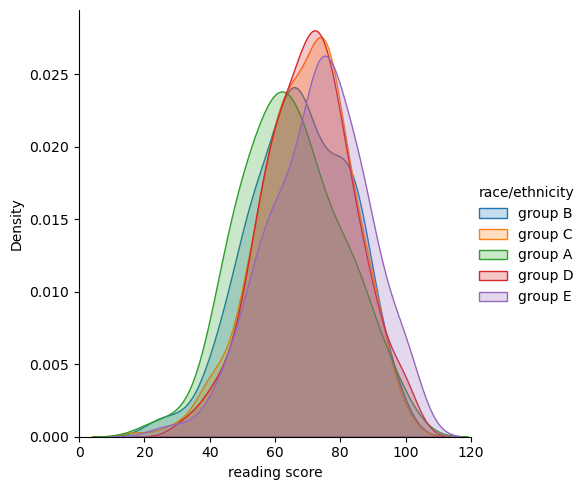

In [21]:
(sborn
 .FacetGrid(students,
            hue = "race/ethnicity",
            height=5,
            xlim=(0,120))
              .map(sborn.kdeplot,"reading score",fill=True).add_legend())

Bu yoğunluk grafiğine göre E grubunun okuma puanı başarı yoğunluğunun diğer gruplara göre daha yüksek değerlerde olduğunu yorumlayabiliriz. 

A grubunun ise okuma puanı başarı yoğunluğunun diğer gruplara göre daha düşük değerlerde olduğunu yorumlayabiliriz. 

VERİ ÖN İŞLEME:

In [22]:
data_orjinal = students
st_data = data_orjinal.dropna()#eksik degerler göz ardı edildi
st_data.isnull().sum()# degiskenlede eksik deger olmadığını kanıtlamak için


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
st_math =st_data["math score"]
st_write =st_data["writing score"]
st_read =st_data["reading score"]


In [24]:
#MATEMATİK PUANLARI İÇİN VERİ ÖN İŞLEME

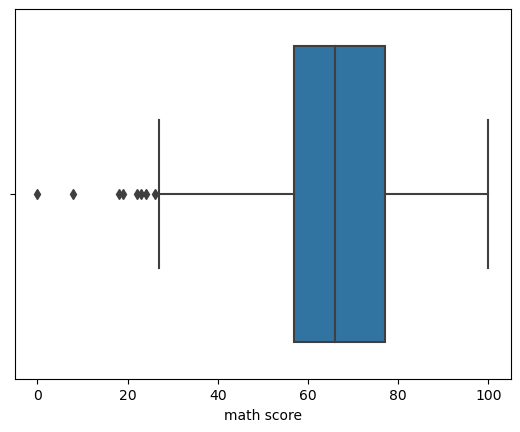

In [25]:
sborn.boxplot(x = st_math);

In [26]:
M1 = st_math.quantile(0.25)
M3 = st_math.quantile(0.75)
IMQ = M3-M1

IMQ
#Matematik puani icin ceyrekler arasi aciklik hesaplandi

20.0

In [27]:
Mat_Alt = M1- 1.5*IMQ
Mat_Alt 
#Ust sinir en fazla 100 olduguu icin ust aykiri deger yoktur o yüzden yapılmaya gerek duyulmamıştır
#Matematik Puaninin Alt sinir 27.0

27.0

In [28]:
mat_aykiri=(st_math < Mat_Alt)#Matematik puaninin aykiri olan degerleri bulunur ve yazilir
Aykiri_mat=st_math[mat_aykiri]
Aykiri_mat


17     18.0
59      0.0
145    22.0
338    24.0
466    26.0
787    19.0
842    23.0
980     8.0
Name: math score, dtype: float64

In [29]:
st_math[mat_aykiri] = st_math.mean()#matematik punalarinda aykiri olan degerlere matematik oratalama puani verilir
st_math[mat_aykiri]


17     66.192982
59     66.192982
145    66.192982
338    66.192982
466    66.192982
787    66.192982
842    66.192982
980    66.192982
Name: math score, dtype: float64

In [30]:
st_math[59]#Aykiri deger iceren indekste kontrol ediyorum

66.19298245614036

In [31]:
st_data['math score']=st_math #aykiri degerden arindilirmis matematik puanlarini tekrar veri setime atiyorum
st_data.head(60)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.000000,72.0,74.0
1,female,group C,some college,standard,completed,69.000000,90.0,88.0
2,female,group B,master's degree,standard,none,90.000000,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.000000,57.0,44.0
5,female,group B,associate's degree,standard,none,71.000000,83.0,78.0
6,female,group B,some college,standard,completed,88.000000,95.0,92.0
7,male,group B,some college,free/reduced,none,40.000000,43.0,39.0
9,female,group B,high school,free/reduced,none,38.000000,60.0,50.0
12,female,group B,high school,standard,none,65.000000,81.0,73.0
13,male,group A,some college,standard,completed,78.000000,72.0,70.0


In [32]:
#OKUMA PUANLARI İÇİN VERİ ÖN İŞLEME

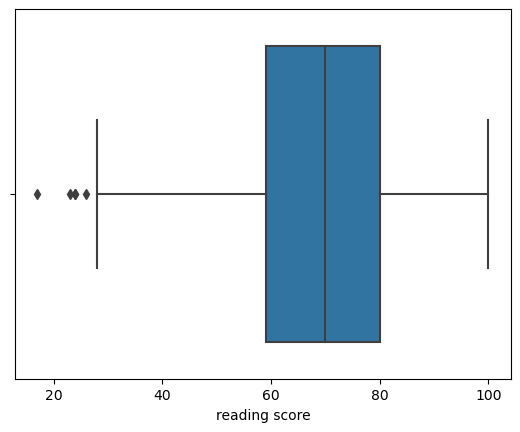

In [33]:
sborn.boxplot(x = st_read);

In [34]:
R1 = st_read.quantile(0.25)
R3 = st_read.quantile(0.75)
IRQ = R3-R1
IRQ
#okuma Puani icin ceyrekler arasi aciklik hesaplandi

21.0

In [35]:
Oku_Alt = R1- 1.5*IRQ
Oku_Alt 
#Ust sinir en fazla 100 olduguu icin ust aykiri deger yoktur o yüzden yapılmaya gerek duyulmamıştır
#Okuma Puaninin alt siniri 27.5

27.5

In [36]:
oku_aykiri=(st_read < Oku_Alt)#Okuma puaninin aykiri olan degerleri bulunur ve yazilir
Aykiri_oku=st_read[oku_aykiri]
Aykiri_oku

59     17.0
76     26.0
327    23.0
596    24.0
980    24.0
Name: reading score, dtype: float64

In [37]:
st_read[oku_aykiri] = st_read.mean()#okuma punalarinda aykiri olan degerlere okuma oratalama puani verilir
st_read[oku_aykiri]


59     69.221878
76     69.221878
327    69.221878
596    69.221878
980    69.221878
Name: reading score, dtype: float64

In [38]:
st_read[59]#Aykiri deger iceren indekste kontrol ediyorum

69.2218782249742

In [39]:
st_data["reading score"]=st_read #aykiri degerden arindilirmis okuma puanlarini tekrar veri setime atiyorum
st_data.head(60)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.000000,72.000000,74.0
1,female,group C,some college,standard,completed,69.000000,90.000000,88.0
2,female,group B,master's degree,standard,none,90.000000,95.000000,93.0
3,male,group A,associate's degree,free/reduced,none,47.000000,57.000000,44.0
5,female,group B,associate's degree,standard,none,71.000000,83.000000,78.0
6,female,group B,some college,standard,completed,88.000000,95.000000,92.0
7,male,group B,some college,free/reduced,none,40.000000,43.000000,39.0
9,female,group B,high school,free/reduced,none,38.000000,60.000000,50.0
12,female,group B,high school,standard,none,65.000000,81.000000,73.0
13,male,group A,some college,standard,completed,78.000000,72.000000,70.0


In [40]:
#YAZMA PUANLARI İÇİN VERİ ÖN İŞLEM

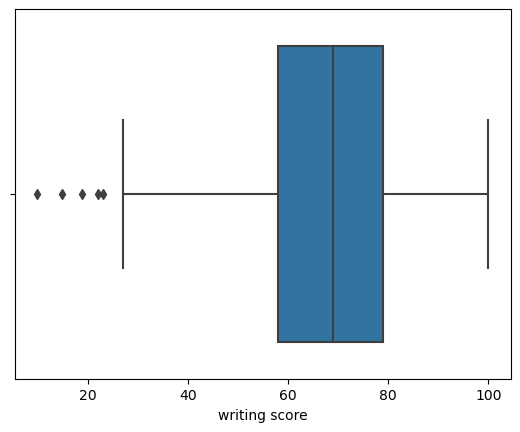

In [41]:
sborn.boxplot(x = st_write);

In [42]:
W1 = st_write.quantile(0.25)
W3 = st_write.quantile(0.75)
IWQ = W3-W1
IWQ
#yazma Puani icin ceyrekler arasi aciklik hesaplandi

21.0

In [43]:
Yaz_Alt = W1- 1.5*IWQ
Yaz_Alt 
#Ust sinir en fazla 100 olduguu icin ust aykiri deger yoktur o yüzden yapılmaya gerek duyulmamıştır
#yazma puanin alt siniri 26.5

26.5

In [44]:
yaz_aykiri=(st_write < Yaz_Alt)#Yaz puaninin aykiri olan degerleri bulunur ve yazilir
Aykiri_yaz=st_write[yaz_aykiri]
Aykiri_yaz


59     10.0
76     22.0
327    19.0
596    15.0
980    23.0
Name: writing score, dtype: float64

In [45]:
st_write[yaz_aykiri] = st_write.mean()#yazma punalarinda aykiri olan degerlere yazma oratalama puani verilir
st_write[yaz_aykiri].head(60)

59     68.112487
76     68.112487
327    68.112487
596    68.112487
980    68.112487
Name: writing score, dtype: float64

In [46]:
st_write[76]#Aykiri deger iceren indekste kontrol ediyorum

68.1124871001032

In [47]:
st_data["writing score"]=st_write#aykiri degerden arindilirmis yazma puanlarini tekrar veri setime atiyorum


Eksik Veri Analizi

In [48]:
#Aykiri degerlerden arindirilmis oplan veri seti , eksik veri seti bulunduran data_orjinal verisetine index uyumuyla aktarilir
data_orjinal.loc[st_data.index] = st_data 
data_orjinal.head(60)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.000000,72.000000,74.000000
1,female,group C,some college,standard,completed,69.000000,90.000000,88.000000
2,female,group B,master's degree,standard,none,90.000000,95.000000,93.000000
3,male,group A,associate's degree,free/reduced,none,47.000000,57.000000,44.000000
4,male,group C,some college,standard,NaN,76.000000,78.000000,75.000000
5,female,group B,associate's degree,standard,none,71.000000,83.000000,78.000000
6,female,group B,some college,standard,completed,88.000000,95.000000,92.000000
7,male,group B,some college,free/reduced,none,40.000000,43.000000,39.000000
8,male,group D,high school,free/reduced,completed,NaN,64.000000,NaN
9,female,group B,high school,free/reduced,none,38.000000,60.000000,50.000000


In [49]:
!pip install missingno 
#kütüphaneyi indiriyoruz
import missingno as ms

In [50]:
data_orjinal.isnull().sum() # değişkenlerdeki eksik değerlere erişim. Her bir değişkendeki eksik değer sayısını verecektir.

gender                         6
race/ethnicity                 1
parental level of education    1
lunch                          4
test preparation course        6
math score                     7
reading score                  5
writing score                  5
dtype: int64

In [51]:
data_orjinal.notnull().sum() #Tam değerlerin boş olmayan gözlemlerin sayılarını veirir

gender                         994
race/ethnicity                 999
parental level of education    999
lunch                          996
test preparation course        994
math score                     993
reading score                  995
writing score                  995
dtype: int64

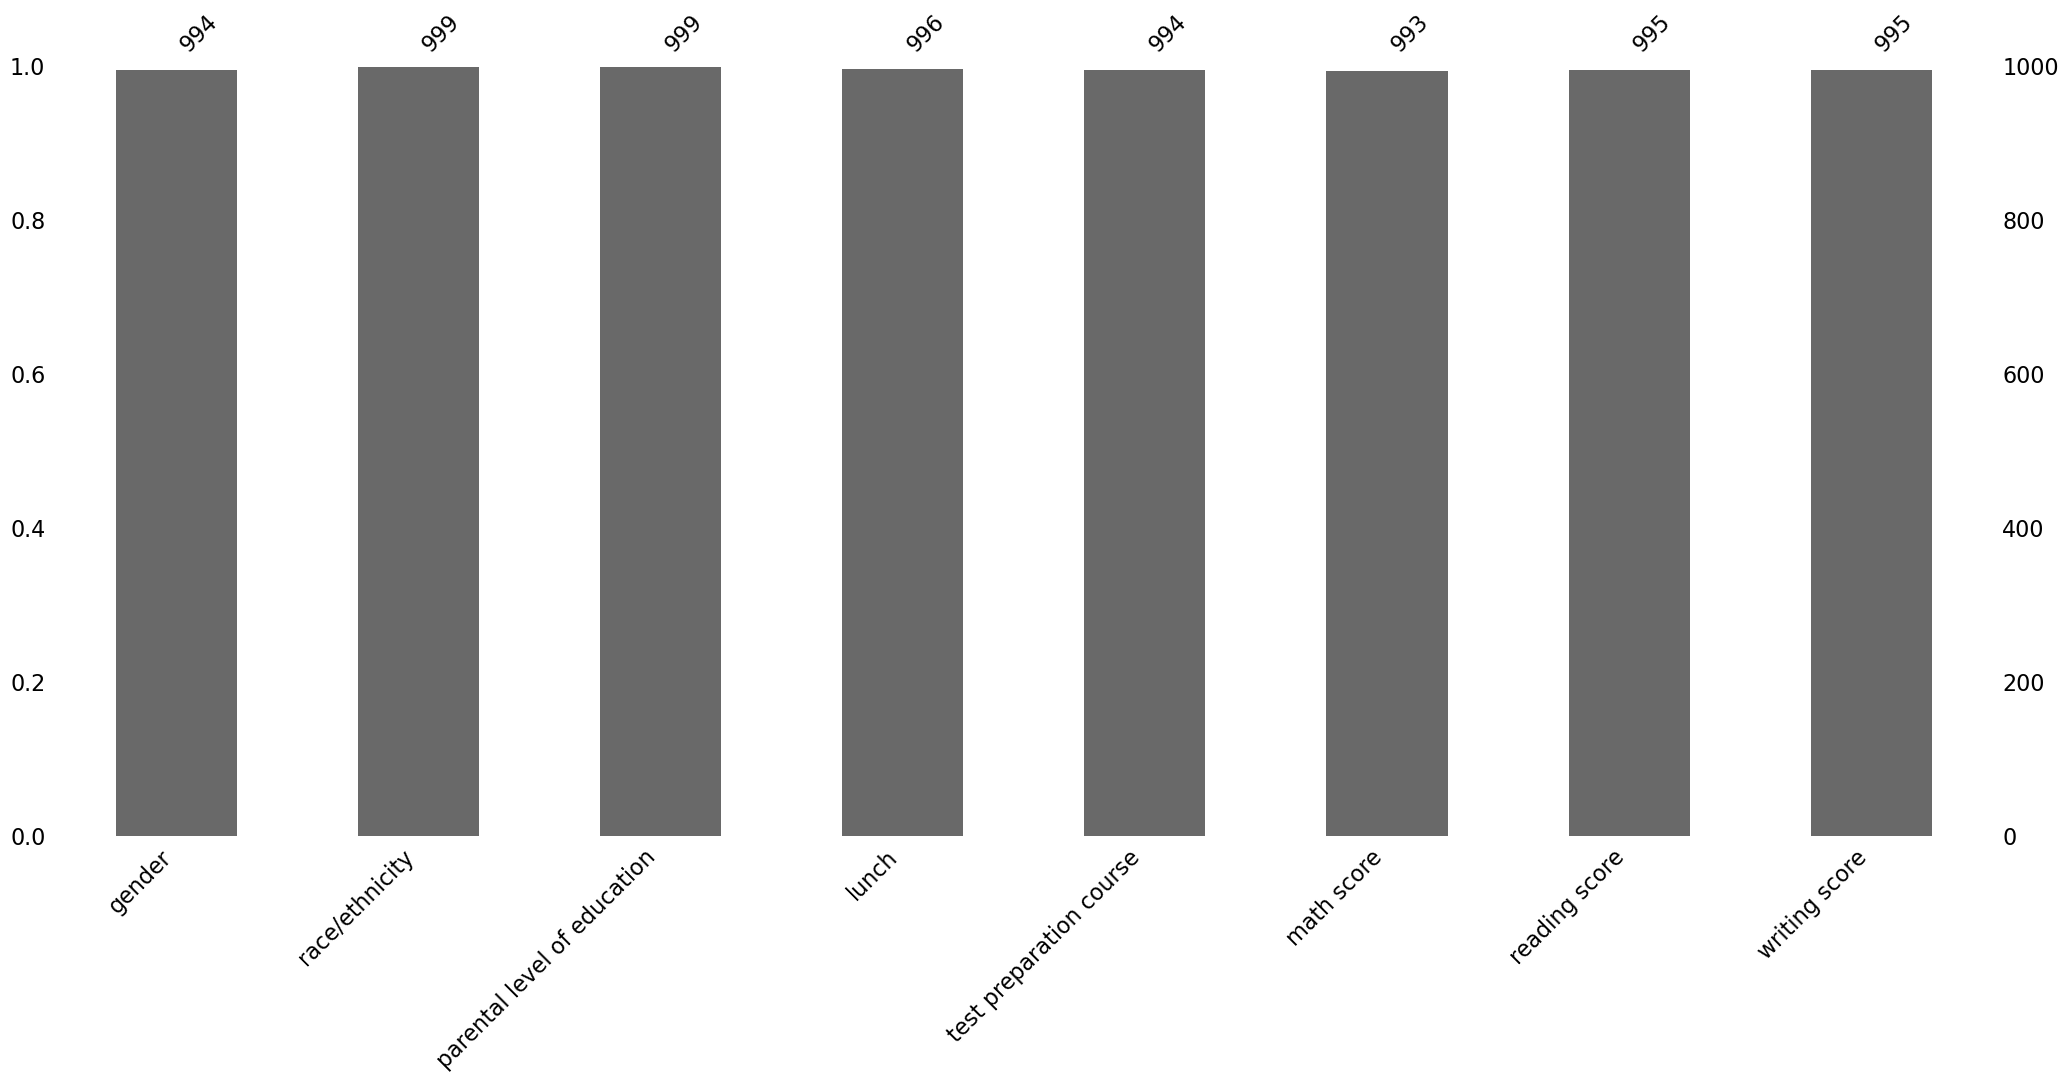

In [52]:
ms.bar(data_orjinal);#değişkenlerdeki eksikliği oransal olarak ifade eder. Y ekseni tamlığın oranını verir. Üstteki rakamlar tam gözlem sayısını verir.

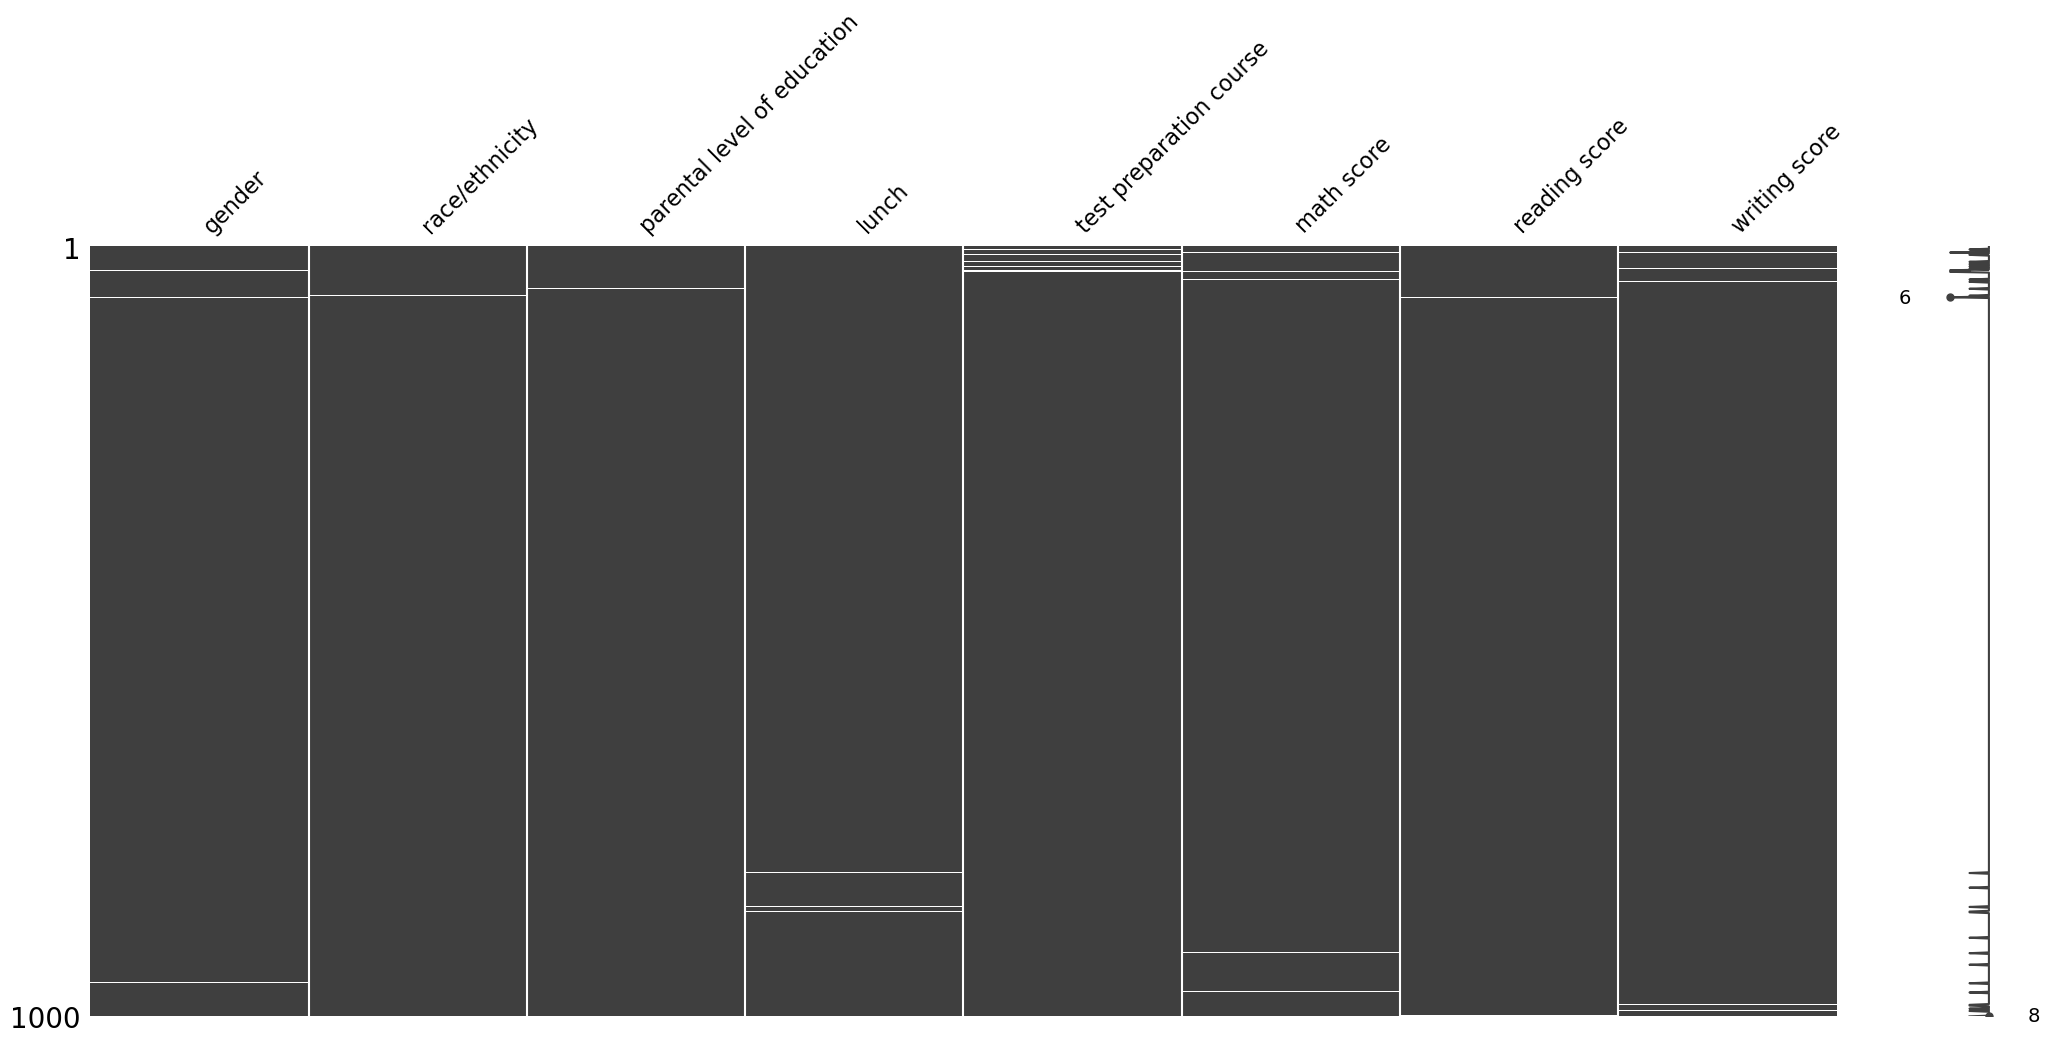

In [53]:
ms.matrix(data_orjinal);

In [54]:
data_orjinal.isnull().sum().sum() #Değişken bazında değil se toplam eksik değer sayısını verecektir

35

In [55]:
data_nan=data_orjinal[data_orjinal.isnull().any(axis = 1)]# Bir satirda herhangi bir eksik veri varsa onu o satiri yazdirir
data_nan

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
4,male,group C,some college,standard,NaN,76.0,78.0,75.0
8,male,group D,high school,free/reduced,completed,NaN,64.0,NaN
10,male,group C,associate's degree,standard,none,58.0,NaN,52.0
11,male,group D,associate's degree,standard,NaN,40.0,52.0,43.0
20,male,group D,high school,standard,NaN,66.0,69.0,63.0
23,female,group C,some high school,standard,none,69.0,NaN,73.0
26,male,group B,some college,standard,NaN,69.0,54.0,55.0
29,female,group D,master's degree,standard,none,62.0,70.0,NaN
31,NaN,group B,some college,standard,NaN,63.0,65.0,61.0
32,female,group E,master's degree,free/reduced,none,56.0,NaN,65.0


In [56]:
data_nan_sayisal = data_nan.select_dtypes(include = ['float64'])
data_nan_sayisal #eksik veri bulunduran satirlardan sayisal olanlari data_nan_sayisal degiskenine atiyorum

,math score,reading score,writing score
4,76.0,78.0,75.0
8,NaN,64.0,NaN
10,58.0,NaN,52.0
11,40.0,52.0,43.0
20,66.0,69.0,63.0
23,69.0,NaN,73.0
26,69.0,54.0,55.0
29,62.0,70.0,NaN
31,63.0,65.0,61.0
32,56.0,NaN,65.0


In [57]:
#coklu deger atama fonksiyonunu kullandim
data_nan_sayisal=data_nan_sayisal.apply(lambda x: x.fillna(x.mean()), axis = 0)#eksik veri bulunan sayisal degerleri icin eksik veri hangi sutundaysa onun ortalamasini atiyor
data_nan_sayisal

,math score,reading score,writing score
4,76.000000,78.000000,75.000000
8,63.666667,64.000000,66.115385
10,58.000000,68.115385,52.000000
11,40.000000,52.000000,43.000000
20,66.000000,69.000000,63.000000
23,69.000000,68.115385,73.000000
26,69.000000,54.000000,55.000000
29,62.000000,70.000000,66.115385
31,63.000000,65.000000,61.000000
32,56.000000,68.115385,65.000000


In [58]:
data_nan_obje = data_nan.select_dtypes(include='object')

data_nan_obje#eksik veri bulunduran satirlardan sayisal olanlari data_nan_obje degiskenine atiyorum

,gender,race/ethnicity,parental level of education,lunch,test preparation course
4,male,group C,some college,standard,NaN
8,male,group D,high school,free/reduced,completed
10,male,group C,associate's degree,standard,none
11,male,group D,associate's degree,standard,NaN
20,male,group D,high school,standard,NaN
23,female,group C,some high school,standard,none
26,male,group B,some college,standard,NaN
29,female,group D,master's degree,standard,none
31,NaN,group B,some college,standard,NaN
32,female,group E,master's degree,free/reduced,none


In [59]:
obje_mod = data_nan_obje.mode().iloc[0]# data nan obje verisetindeki sutunlarda en cok tekrar eden degerler obje_mod a atanir

obje_mod

gender                               female
race/ethnicity                      group C
parental level of education    some college
lunch                              standard
test preparation course                none
Name: 0, dtype: object

In [60]:
data_nan_obje.fillna(value=obje_mod, inplace=True)# obje mod daki degerler turune gore data_nan_obje verisetindeki eksik verilere atama islemi yaptim

data_nan_obje

,gender,race/ethnicity,parental level of education,lunch,test preparation course
4,male,group C,some college,standard,none
8,male,group D,high school,free/reduced,completed
10,male,group C,associate's degree,standard,none
11,male,group D,associate's degree,standard,none
20,male,group D,high school,standard,none
23,female,group C,some high school,standard,none
26,male,group B,some college,standard,none
29,female,group D,master's degree,standard,none
31,female,group B,some college,standard,none
32,female,group E,master's degree,free/reduced,none


In [61]:
data_nan_obje.isnull().any()#eksik veri seti varmi diye kontrol ediyorum

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
dtype: bool

In [62]:
data_nan[data_nan_obje.columns] = data_nan_obje
data_nan[data_nan_sayisal.columns] = data_nan_sayisal
data_nan # duzenlen eksik sayisal ve obje turundeki degerler tekrar sadece eksik veri satirinin bulundugu verisetine ekleniyor
#data_nan vveri seti artik eksik veriler doldurulmus oluyor

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
4,male,group C,some college,standard,none,76.000000,78.000000,75.000000
8,male,group D,high school,free/reduced,completed,63.666667,64.000000,66.115385
10,male,group C,associate's degree,standard,none,58.000000,68.115385,52.000000
11,male,group D,associate's degree,standard,none,40.000000,52.000000,43.000000
20,male,group D,high school,standard,none,66.000000,69.000000,63.000000
23,female,group C,some high school,standard,none,69.000000,68.115385,73.000000
26,male,group B,some college,standard,none,69.000000,54.000000,55.000000
29,female,group D,master's degree,standard,none,62.000000,70.000000,66.115385
31,female,group B,some college,standard,none,63.000000,65.000000,61.000000
32,female,group E,master's degree,free/reduced,none,56.000000,68.115385,65.000000


In [63]:
data_nan.isnull().sum() #kontrol

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [64]:
data_orjinal[data_orjinal.isnull().any(axis = 1)] =data_nan # enson duzenlenmis verileri tekrardan data_orjinal verimize atiyoruz
data_orjinal # Artik Verimiz Aykiri verilerden ve Eksik verilerden arindirilmistir

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.000000,74.0
1,female,group C,some college,standard,completed,69.0,90.000000,88.0
2,female,group B,master's degree,standard,none,90.0,95.000000,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.000000,44.0
4,male,group C,some college,standard,none,76.0,78.000000,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.000000,95.0
996,male,group C,high school,free/reduced,none,62.0,55.000000,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.000000,65.0
998,female,group D,some college,standard,completed,68.0,78.000000,77.0


In [65]:
data_orjinal.to_excel('verisetii.xlsx', index=False)

In [66]:
veri_seti_guncel=pd.read_csv('veriseti.xlsx')
veri_seti_guncel.head(60)

FileNotFoundError: [Errno 2] No such file or directory: 'veriseti.xlsx'

# 2. Bölüm Final

In [67]:
#gerekli kutuphanelerimi projeme import ettim
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [68]:
data_orjinal.head()
df=data_orjinal
df_sayisal = data_orjinal.iloc[:,5:8]#veri setimiz sayisal degerlerini aliyoruz
   #veri setimizin sayisal olmayan degerlerini aliyoruz
df_kategorik = data_orjinal.iloc[:,0:5]

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans
#Kmeans kutuphanesi kullanarak kümeleme algoritmasiyla 4 küme olusturduk

KMeans(n_clusters=4)

In [70]:
pip install --upgrade joblib scikit-learn
# fit ederken hata aldigim icin gerekli guncellemeri yaptim

SyntaxError: invalid syntax (2261618896.py, line 1)

In [72]:
k_fit = kmeans.fit(df_sayisal) # elimizdeki veri setini fit ediyoruz
#KMeans algoritması, veri noktalarını belirli sayıdaki kümelere bölmeye çalışan bir kümeleme algoritmasıdır.
#Bu kümeleme işlemi, veri setindeki örüntüleri analiz ederek, her bir veri noktasını belirli bir küme veya küme merkezine atar.

In [73]:
k_fit.n_clusters #küme sayısını verir

4

In [74]:
k_fit.cluster_centers_ 
#oluşturulan kümelerin merkezlerini verir. 3 değişken olduğu için 4 kümeye ait 3merkez verilmiş

array([[85.53513514, 88.84864865, 88.20540541],
       [59.63157895, 63.02419791, 62.05233117],
       [48.14189319, 49.05008453, 46.74725275],
       [71.61892519, 74.98182335, 74.11271544]])

In [75]:
k_fit.labels_#gözlemlerin hangi kümeye ait olduğu bilgisini verir

array([3, 0, 0, 2, 3, 3, 0, 2, 1, 2, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 1, 3,
       2, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 2, 0, 3, 3, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 3, 3, 0, 2, 3, 2, 3, 0, 2, 0, 2, 1, 3, 3, 2, 1, 3, 1, 1,
       2, 3, 1, 2, 1, 1, 2, 1, 2, 2, 1, 3, 3, 1, 2, 2, 2, 1, 2, 3, 0, 3,
       1, 3, 3, 2, 3, 2, 0, 3, 1, 3, 1, 1, 3, 3, 0, 2, 0, 1, 0, 1, 1, 3,
       0, 2, 2, 2, 0, 3, 0, 3, 1, 1, 0, 0, 0, 1, 3, 0, 3, 3, 3, 2, 0, 2,
       3, 3, 3, 2, 2, 1, 1, 1, 3, 1, 2, 2, 3, 2, 0, 3, 3, 0, 1, 3, 1, 2,
       1, 0, 3, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 3, 3, 3, 3, 0, 0, 1, 2, 0,
       2, 3, 1, 0, 3, 1, 2, 3, 2, 1, 3, 1, 2, 0, 1, 3, 1, 1, 3, 1, 1, 2,
       2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 1, 1, 0, 0, 0, 2, 3, 1,
       1, 0, 1, 3, 1, 2, 3, 2, 3, 0, 3, 2, 3, 0, 0, 3, 1, 1, 2, 0, 3, 0,
       2, 2, 3, 3, 3, 1, 1, 1, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 0,
       3, 2, 3, 3, 0, 3, 1, 2, 2, 3, 0, 3, 0, 1, 3, 1, 2, 2, 3, 3, 2, 0,
       0, 3, 3, 3, 3, 3, 1, 3, 3, 1, 2, 3, 2, 0, 3,

In [76]:
kumeler =k_fit.labels_
kumeler #gözlemlerin hangi kümeye ait olduğu bilgisini veren tabloyu kumeler degiskenine atadik

array([3, 0, 0, 2, 3, 3, 0, 2, 1, 2, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 1, 3,
       2, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 2, 0, 3, 3, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 3, 3, 0, 2, 3, 2, 3, 0, 2, 0, 2, 1, 3, 3, 2, 1, 3, 1, 1,
       2, 3, 1, 2, 1, 1, 2, 1, 2, 2, 1, 3, 3, 1, 2, 2, 2, 1, 2, 3, 0, 3,
       1, 3, 3, 2, 3, 2, 0, 3, 1, 3, 1, 1, 3, 3, 0, 2, 0, 1, 0, 1, 1, 3,
       0, 2, 2, 2, 0, 3, 0, 3, 1, 1, 0, 0, 0, 1, 3, 0, 3, 3, 3, 2, 0, 2,
       3, 3, 3, 2, 2, 1, 1, 1, 3, 1, 2, 2, 3, 2, 0, 3, 3, 0, 1, 3, 1, 2,
       1, 0, 3, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 3, 3, 3, 3, 0, 0, 1, 2, 0,
       2, 3, 1, 0, 3, 1, 2, 3, 2, 1, 3, 1, 2, 0, 1, 3, 1, 1, 3, 1, 1, 2,
       2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 1, 1, 0, 0, 0, 2, 3, 1,
       1, 0, 1, 3, 1, 2, 3, 2, 3, 0, 3, 2, 3, 0, 0, 3, 1, 1, 2, 0, 3, 0,
       2, 2, 3, 3, 3, 1, 1, 1, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 0,
       3, 2, 3, 3, 0, 3, 1, 2, 2, 3, 0, 3, 0, 1, 3, 1, 2, 2, 3, 3, 2, 0,
       0, 3, 3, 3, 3, 3, 1, 3, 3, 1, 2, 3, 2, 0, 3,

In [77]:
etnik_koken = df_kategorik["race/ethnicity"]


In [78]:
pd.DataFrame({"Etnik Koken" : etnik_koken, "Kumeler": kumeler})[0:15] #etnik kokendeki ozellegindeki gozlemlerin hangi grupta oldugunu gosterir



,Etnik Koken,Kumeler
0,group B,3
1,group C,0
2,group B,0
3,group A,2
4,group C,3
5,group B,3
6,group B,0
7,group B,2
8,group D,1
9,group B,2


In [79]:
 #veri setimize kume numarasi gosteren sütun ekledik
df["kume_no"] = kumeler

In [80]:
df_sayisal
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,kume_no
0,female,group B,bachelor's degree,standard,none,72.0,72.000000,74.0,3
1,female,group C,some college,standard,completed,69.0,90.000000,88.0,0
2,female,group B,master's degree,standard,none,90.0,95.000000,93.0,0
3,male,group A,associate's degree,free/reduced,none,47.0,57.000000,44.0,2
4,male,group C,some college,standard,none,76.0,78.000000,75.0,3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.000000,95.0,0
996,male,group C,high school,free/reduced,none,62.0,55.000000,55.0,1
997,female,group C,high school,free/reduced,completed,59.0,71.000000,65.0,1
998,female,group D,some college,standard,completed,68.0,78.000000,77.0,3


In [81]:
!pip install yellowbrick #yellowbrick kutuphanesi indirildi

ERROR: Invalid requirement: '#yellowbrick'


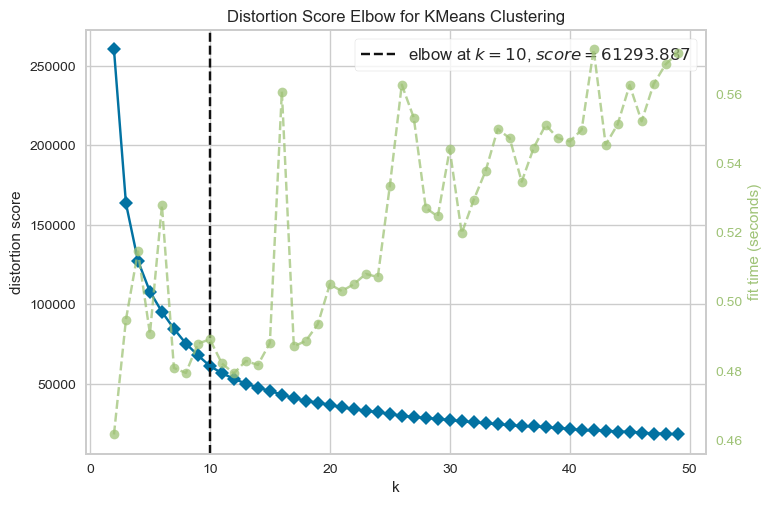

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
gorsel = KElbowVisualizer(kmeans, k=(2,50)).fit(df_sayisal)
gorsel.poof()  #olusturulan gorseli goruntuler

In [80]:
optimal_kume_deger= gorsel.elbow_value_
optimal_kume_deger

10

In [85]:
kmeans = KMeans(n_clusters = 10)
k_fit = kmeans.fit(df_sayisal)
kumeler = k_fit.labels_

In [84]:
pd.DataFrame({"Etnik Koken" : etnik_koken, "Kumeler": kumeler})[0:15] #etnik kokendeki ozellegindeki gozlemlerin hangi grupta oldugunu gosterir



,Etnik Koken,Kumeler
0,group B,3
1,group C,0
2,group B,0
3,group A,2
4,group C,3
5,group B,3
6,group B,0
7,group B,2
8,group D,1
9,group B,2


In [86]:
Score_mean = df_sayisal.groupby(kumeler).mean()

Score_mean
#burasi kumelerdeki sayisal degiskenleri yani ders puanlarinin ortalamasini aliyor

,math score,reading score,writing score
0,54.835169,48.697674,46.174419
1,80.057471,88.413793,88.770115
2,73.786885,69.550126,68.000000
3,47.128713,59.027535,57.458787
4,93.660000,94.980000,94.680000
5,59.836014,68.934438,69.060323
6,84.680000,80.180000,77.960000
7,68.750583,78.637171,78.272727
8,39.104167,42.666667,40.770833
9,63.745098,59.715255,57.849709


In [136]:
df['kume_no'] = kmeans.fit_predict(df_sayisal)
etnik_mode = df.groupby(kumeler)['race/ethnicity'].apply(lambda x: x.mode().iloc[0])
etnik_mode


0    group C
1    group C
2    group C
3    group B
4    group C
5    group D
6    group E
7    group C
8    group D
9    group C
Name: race/ethnicity, dtype: object

In [87]:
df['kume_no'] = kmeans.fit_predict(df_sayisal)
egitim_mod = df.groupby(kumeler)['parental level of education'].apply(lambda x: x.mode().iloc[0])
egitim_mod



0           high school
1          some college
2           high school
3    associate's degree
4    associate's degree
5    associate's degree
6    associate's degree
7          some college
8           high school
9          some college
Name: parental level of education, dtype: object

# Hiyerarşik Kümeleme

In [92]:
data_orjinal.head()
df= data_orjinal
df_sayisal = data_orjinal.iloc[:,5:8]#veri setimiz sayisal degerlerini aliyoruz
df_kategorik = data_orjinal.iloc[:,0:5] #veri setimizin sayisal olmayan degerlerini aliyoruz


In [98]:
from scipy.cluster.hierarchy import linkage

dir("hc_complete") #detayli bilgi icin
hc_complete = linkage(df_sayisal, "complete")

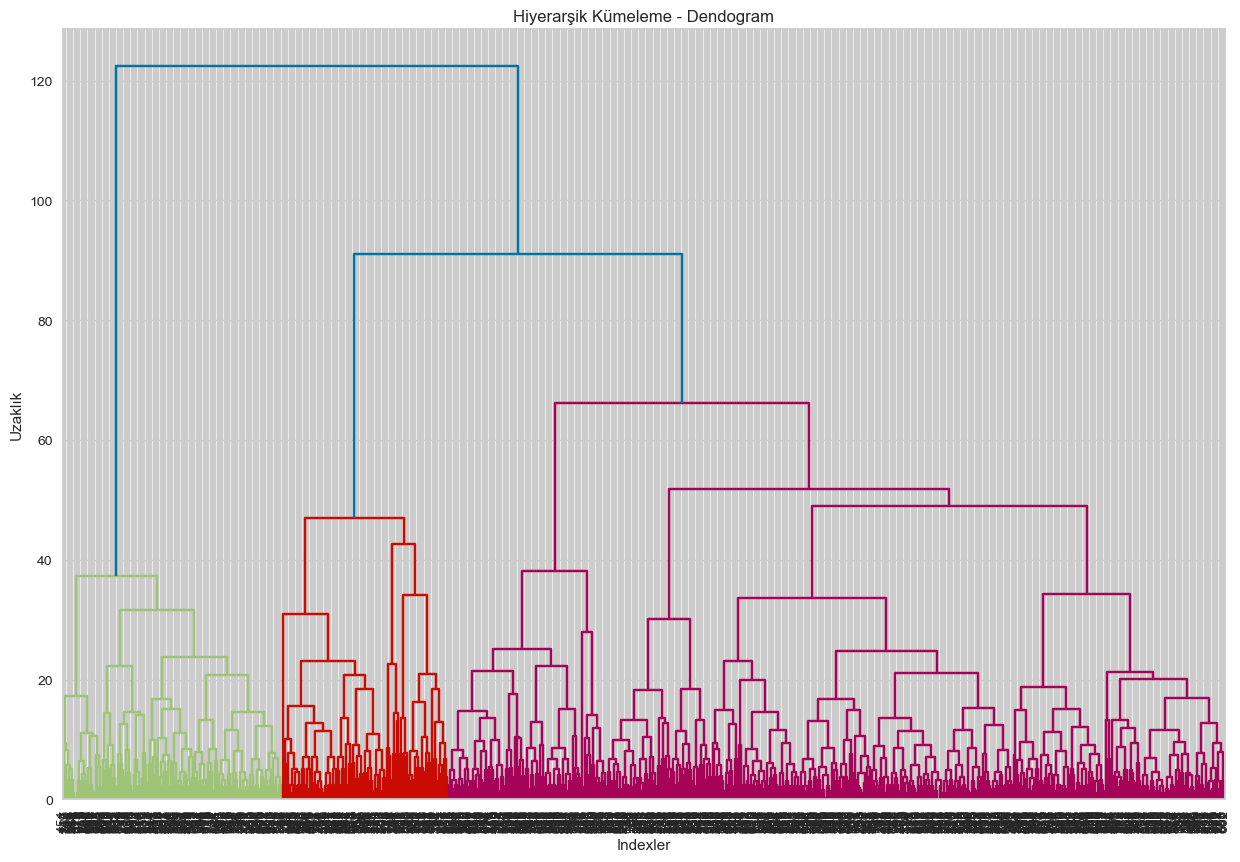

In [99]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))#Matplotlib kütüphanesini kullanarak bir figür oluşturur. Bu figürün boyutları (15, 10) piksel olacak şekilde belirlenmiştir.
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10 #Yaprak düğümlerin üzerinde görünen yazıların font boyutu.

);

#complete metoduna göre bir dendrogram oluşturduk

In [100]:
hc_complete = linkage(df_sayisal, "complete")
df_linkage = pd.DataFrame(hc_complete, columns=['Küme1', 'Küme2', 'Uzaklık', 'Yeni Küme Sayısı'])
df_linkage

,Küme1,Küme2,Uzaklık,Yeni Küme Sayısı
0,457.0,597.0,0.000000,2.0
1,59.0,980.0,0.000000,2.0
2,187.0,684.0,0.000000,2.0
3,355.0,431.0,0.000000,2.0
4,365.0,947.0,0.000000,2.0
...,...,...,...,...
994,1987.0,1989.0,49.010203,441.0
995,1984.0,1994.0,51.903757,532.0
996,1991.0,1995.0,66.171081,668.0
997,1993.0,1996.0,90.994505,811.0


Yukaridaki dendrogramda gorundugu gibi karmasik oldugundan dendogram uzerinde kırpma islemi uygulanmistir ve dendrogramın daha temiz ve sade görünmesine katkı sağlamıştır.

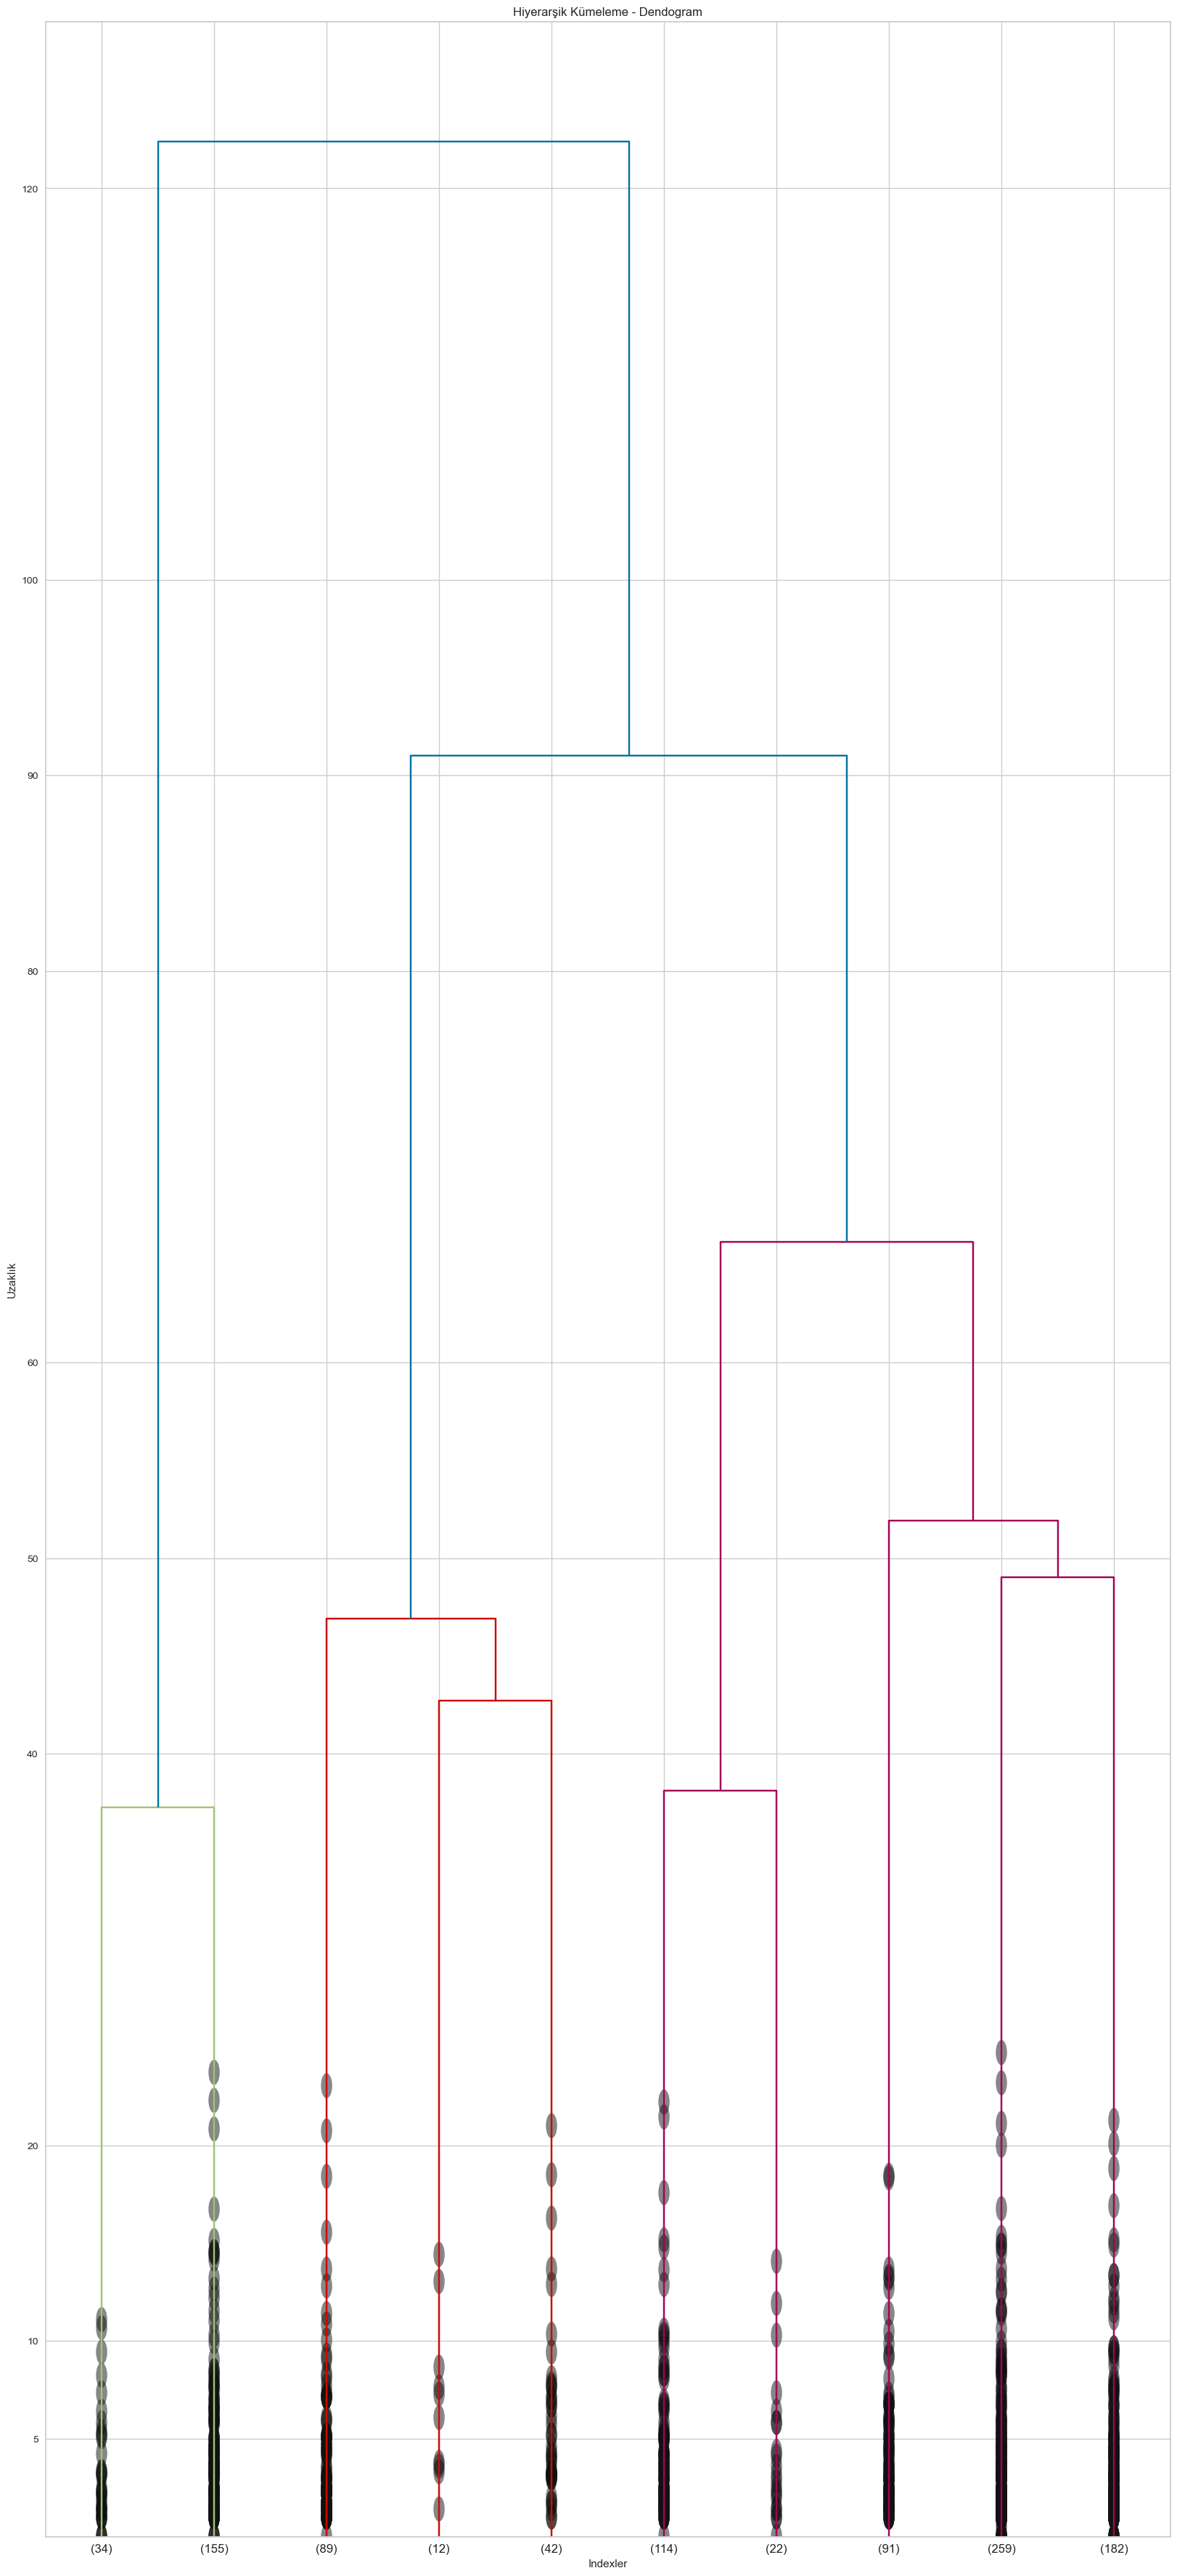

In [143]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(20, 45)) #gorunus kolayligi acisindan boyut buyutulmustur
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
plt.yticks([5,10,20, 40,50, 60,80, 90,100, 120, 140])
#ancak nedense 140 gelmiyor
#daha saglikli gorunum icin y eksen deger araliklarini sıklaştırdım 
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 10,
    #lastp değeri kullanıldığında, dendrogramın en 
    #üstteki birleşim adımlarının gösterileceği belirli bir eleman sayısı (p) belirlenir.
    show_contracted = True  #dendrogram üzerinde birleşmiş düğümler gösterilmez 
);

In [101]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 10, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df_sayisal)

df_sayisal["kume_no"] = cluster.fit_predict(df_sayisal)
kumeler = df_sayisal["kume_no"]
df_sayisal


,math score,reading score,writing score,kume_no
0,72.0,72.000000,74.0,5
1,69.0,90.000000,88.0,1
2,90.0,95.000000,93.0,8
3,47.0,57.000000,44.0,7
4,76.0,78.000000,75.0,5
...,...,...,...,...
995,88.0,99.000000,95.0,8
996,62.0,55.000000,55.0,0
997,59.0,71.000000,65.0,9
998,68.0,78.000000,77.0,6


In [102]:
Score_mean = df_sayisal.groupby(kumeler).mean()

Score_mean
#burasi kumelerdeki sayisal degiskenleri yani ders puanlarinin ortalamasini aliyor

,math score,reading score,writing score
kume_no,,,
0,60.820303,53.000000,50.281553
1,83.714286,85.420168,84.252101
2,69.329320,66.696465,65.740787
3,54.175258,62.750320,62.459466
4,40.021277,41.829787,40.085106
5,78.782609,75.470569,73.504348
6,67.849275,78.539130,78.773913
7,47.740000,54.231154,51.740000
8,87.305556,94.208333,94.194444


Hiyerarşik kümeleme işleminde her küme için derslerin ortalamlarını aldık . Tabloya baktığımızda 8. indexli kümenin diğer kümelere göre ders ortalaması daha yüksektir.Yapabileceğimiz diğer yorumda 4. indexli kümenin diğer kümelere göre ders ortalaması daha düşüktür. 

In [103]:
df['kume_no'] = kmeans.fit_predict(df_sayisal)
etnik_mode = df.groupby(kumeler)['race/ethnicity'].apply(lambda x: x.mode().iloc[0])
etnik_mode


kume_no
0    group C
1    group C
2    group D
3    group C
4    group C
5    group D
6    group C
7    group C
8    group D
9    group C
Name: race/ethnicity, dtype: object

In [162]:
df['kume_no'] = kmeans.fit_predict(df_sayisal)
egitim_mod = df.groupby(kumeler)['parental level of education'].apply(lambda x: x.mode().iloc[0])
egitim_mod



kume_no
0          some college
1    associate's degree
2    associate's degree
3          some college
4           high school
5      some high school
6           high school
7    associate's degree
8          some college
9          some college
Name: parental level of education, dtype: object